In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from utilities.graph_utils import save_mpl_fig

In [3]:
data = [
    ("Gender", [
        ("Women", 47.7, 21.7),
        ("Men", 52.3, 78.3)
    ]),
    ("Religion", [
        ("Muslim", 17.70, 8.8),
        ("Non-Muslim", 82.30, 91.2)
    ]),
    ("Caste", [
        ("Unreserved / General (UC)", 15.52, 36.0),
        ("Backward Class (BC)", 27.12, 38.6),
        ("Extremely Backward Class (EBC)", 36.01, 17.6),
        ("Scheduled Castes (SC)", 19.65, 6.8),
        ("Scheduled Tribes (ST)", 1.68, 1.0)
    ])
]
data

[('Gender', [('Women', 47.7, 21.7), ('Men', 52.3, 78.3)]),
 ('Religion', [('Muslim', 17.7, 8.8), ('Non-Muslim', 82.3, 91.2)]),
 ('Caste',
  [('Unreserved / General (UC)', 15.52, 36.0),
   ('Backward Class (BC)', 27.12, 38.6),
   ('Extremely Backward Class (EBC)', 36.01, 17.6),
   ('Scheduled Castes (SC)', 19.65, 6.8),
   ('Scheduled Tribes (ST)', 1.68, 1.0)])]

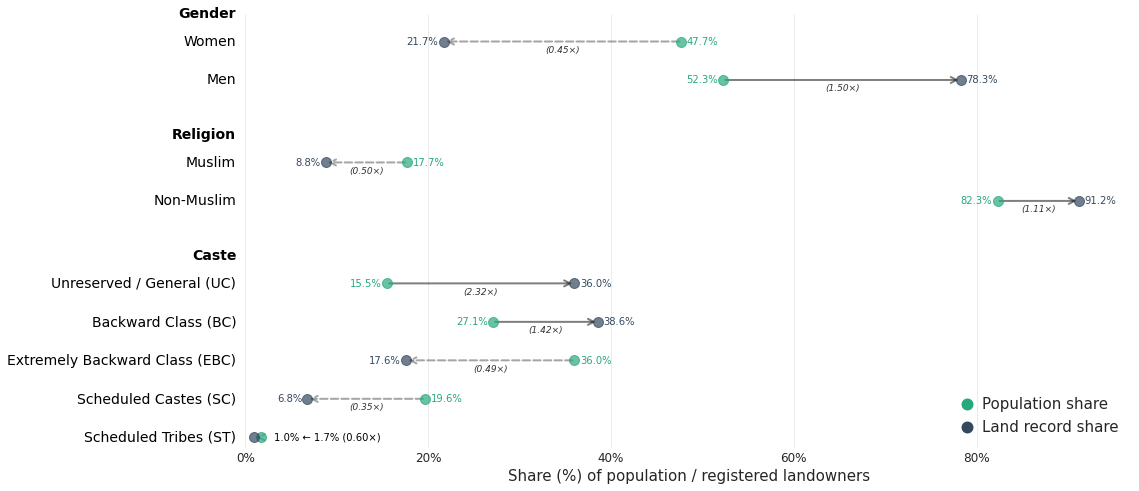

In [136]:
# plot
_, ax = plt.subplots(figsize=(16, 7))

# ============================================================================
# Config
# ============================================================================
y_position = 0
y_positions = []
groups = []
pop_shares = []
owner_shares = []
categories_positions = {}

color_pop = "#28A87D"
color_owner = "#34495E"

# ============================================================================
# Build the layout
# ============================================================================
for category, items in data:
    categories_positions[category] = y_position
    y_position += 0.25
    
    for group, pop, owner in items:
        y_positions.append(y_position)
        groups.append(group)
        pop_shares.append(pop)
        owner_shares.append(owner)
        y_position += 0.35
    
    y_position += 0.15

# ============================================================================
# plot main 
# ============================================================================
for i, y_pos in enumerate(y_positions):
    pop = pop_shares[i]
    owner = owner_shares[i]
    gap = abs(owner - pop)
    group_name = groups[i]
    
    # Determine left and right values
    left_val = min(pop, owner)
    right_val = max(pop, owner)
    
    # Determine line style based on direction
    if owner > pop:
        # Overrepresented - solid line
        linestyle = '-'
    else:
        # Underrepresented - dashed line
        linestyle = '--'
    
    # FancyArrowPatch for BOTH line and arrow with dashed support
    if owner > pop:
        arrow = FancyArrowPatch((left_val, y_pos), (right_val, y_pos),
                               arrowstyle='->', mutation_scale=15, 
                               linewidth=2, linestyle=linestyle,
                               color='0', alpha=0.5, zorder=1)
    else:
        arrow = FancyArrowPatch((right_val, y_pos), (left_val, y_pos),
                               arrowstyle='->', mutation_scale=15,
                               linewidth=2, linestyle=linestyle,
                               color='.3', alpha=0.5, zorder=1)
    ax.add_patch(arrow)
    
    # Points
    ax.scatter(pop, y_pos, color=color_pop, zorder=2, s=100, alpha=.7,)
    ax.scatter(owner, y_pos, color=color_owner, zorder=2, s=100, alpha=.7,)
    
    # ST specific annotation
    if group_name == "Scheduled Tribes (ST)":
        ratio = owner / pop
#         combined_text = f"{pop:.1f}% → {owner:.1f}% ({ratio:.2f}×)"
        combined_text = f"{owner:.1f}% ← {pop:.1f}% ({ratio:.2f}×)"
        ax.text(pop + 1.5, y_pos, combined_text,
                ha='left', va='center', color='black', fontsize=10)
    else:
        # Representation ratio below the line for compactness
        ratio = owner / pop
        ratio_x = (pop + owner) / 2
        ax.text(ratio_x, y_pos + 0.12, f"({ratio:.2f}×)",
                ha='center', va='bottom', color='.2', fontsize=9, style='italic')

        # Place text outside the range
        _pad = .6
        if pop == left_val:
            ax.text(left_val - _pad, y_pos, f"{pop:.1f}%",
                    ha='right', va='center', color=color_pop, fontsize=10)
            ax.text(right_val + _pad, y_pos, f"{owner:.1f}%",
                    ha='left', va='center', color=color_owner, fontsize=10)
        else:
            ax.text(left_val - _pad, y_pos, f"{owner:.1f}%",
                    ha='right', va='center', color=color_owner, fontsize=10)
            ax.text(right_val + _pad, y_pos, f"{pop:.1f}%",
                    ha='left', va='center', color=color_pop, fontsize=10)
    
    # y labels
    ax.text(-1, y_pos, groups[i],
            ha='right', va='center', color='black', fontsize=14)
    
# ============================================================================
# group headers
# ============================================================================    
for category, y_pos in categories_positions.items():
    ax.text(-1, y_pos, category,
            ha='right', va='center', color='black', fontsize=14, weight='bold')
    
# ============================================================================
# legend
# ============================================================================    
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_pop, 
           markersize=10, label='Population share'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_owner, 
           markersize=10, label='Land record share'),
#     Line2D([0], [0], color='grey', linewidth=2, linestyle='-', 
#            label='Overrepresented'),
#     Line2D([0], [0], color='grey', linewidth=2, linestyle='--', 
#            label='Underrepresented')
]
ax.legend(handles=legend_elements, loc='lower right', frameon=False, fontsize=15, markerscale=1.3, handletextpad=0.)

# ============================================================================
# axis
# ============================================================================    
# ax.set_axis_off()
sns.despine(left=True, bottom=True)
ax.set_xlim(0, 97)
ax.set_ylim(0, y_position - 0.4)
ax.grid(False)

# INVERT Y-AXIS so Gender is at top
ax.invert_yaxis()

for x in [0, 20, 40, 60, 80, 100]:
    ax.axvline(x=x, color='.5', alpha=0.3, linewidth=0.5, zorder=0)
    
ax.xaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='x', length=0)
ax.set_xlabel("Share (%) of population / registered landowners", fontsize=15)
ax.set_yticks([])

plt.tight_layout()
save_mpl_fig("../figures/benchmark-ratio")